In [2]:
from ugradio.dft import dft, idft
import numpy as np
import matplotlib.pylab as plt

Error loading librtlsdr. Make sure librtlsdr (and all of its dependencies) are in your path


In [4]:
def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

# load data
all_data = {}
fname = '../data_sec7/dsb_3200_1.npy'
all_data = np.load(fname)[0]
all_data.shape

(2048,)

# 7.1: DSB Mixer

$\nu_{sample} = 3200$ kHz \
Anti-aliasing filter OFF \
6 dB attenuator

Inputs:
$\nu_{LO} = 160$ MHz
$\nu_{RF} = 167.4$ MHz

Data fname: dsb_3200_1.npy

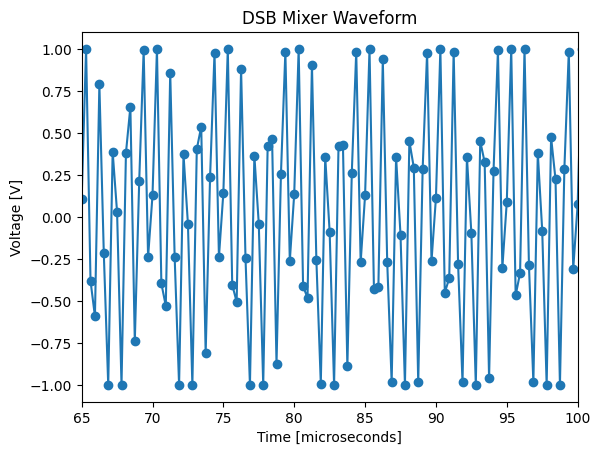

c:\Users\gvnin\Documents\berkeley\astro121\venv\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


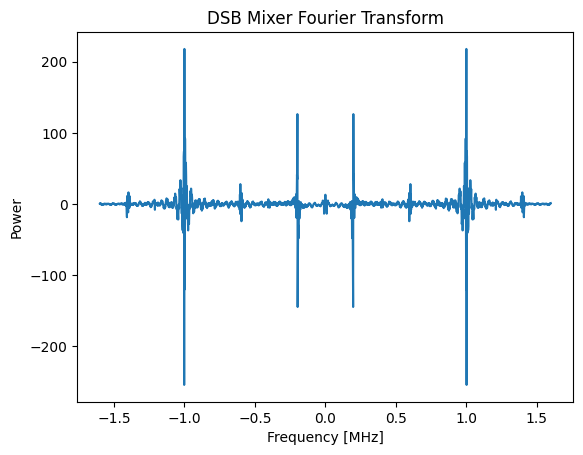

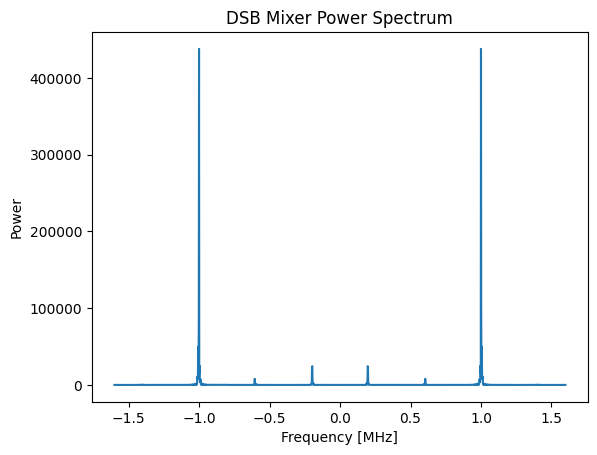

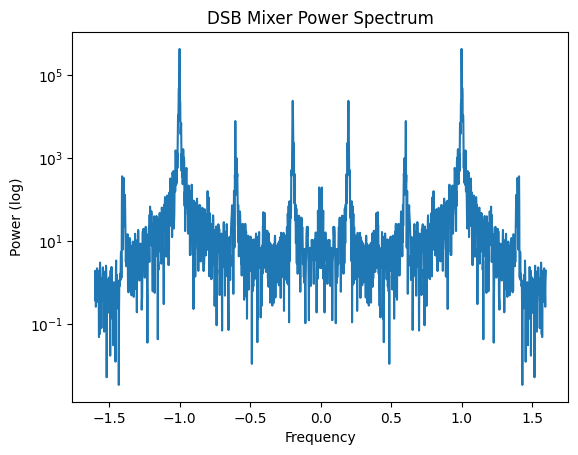

In [17]:
def plot_dsb():
    samp_freq = 3200
    data = all_data.copy()
    time = np.arange(len(data)) * freq_to_period(samp_freq) # in microseconds

    plt.figure()
    plt.plot(time, data)
    plt.scatter(time, data)
    plt.xlim(65, 100)
    plt.title('DSB Mixer Waveform')
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Voltage [V]')
    plt.show()

    f, Fx = dft(data, vsamp=samp_freq/1000)

    plt.figure()
    plt.plot(f, Fx)
    plt.title('DSB Mixer Fourier Transform')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power')
    plt.show()

    plt.figure()
    plt.plot(f, np.abs(Fx)**2)
    plt.title('DSB Mixer Power Spectrum')
    plt.xlabel('Frequency [MHz]')
    plt.ylabel('Power')
    plt.show()

    plt.figure()
    plt.plot(f, np.abs(Fx)**2)
    plt.title('DSB Mixer Power Spectrum')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.yscale('log')
    plt.show()

plot_dsb()

In [9]:
def zeroer(start: float, end: float, data: np.ndarray):
    assert start >= 0
    assert end >= 0

    size = len(data)
    mult_arr = np.zeros(size)
    if start <= 1:
        start = int(start * size)
    if end <= 1:
        end = int(end * size)
    mult_arr[start:end] = 1
    return data.copy() * mult_arr

c:\Users\gvnin\Documents\berkeley\astro121\venv\Lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


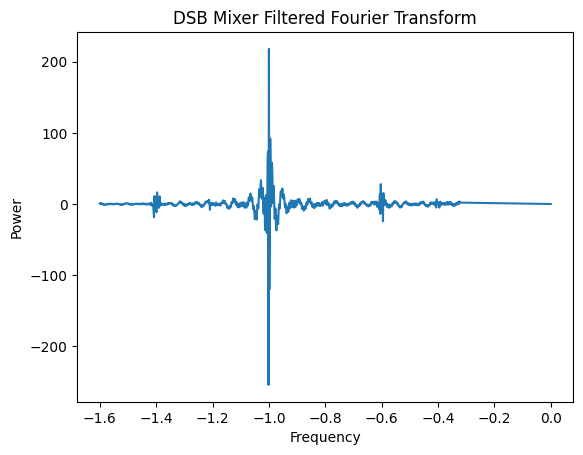

c:\Users\gvnin\Documents\berkeley\astro121\venv\Lib\site-packages\matplotlib\collections.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


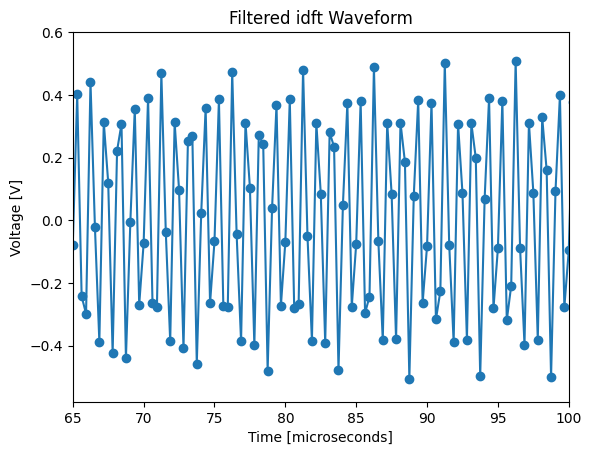

In [10]:
def plot_filtered_dsb():   
    samp_freq = 3200
    data = all_data.copy()
    time = np.arange(len(data)) * freq_to_period(samp_freq) # in microseconds

    f, Fx = dft(data, vsamp=samp_freq/1000)

    low = 0
    high = .4
    f = zeroer(low, high, f)
    Fx = zeroer(low, high, Fx)

    plt.figure()
    plt.plot(f, Fx)
    plt.title('DSB Mixer Filtered Fourier Transform')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.show()

    fi, Fxi = idft(Fx, f, vsamp=samp_freq/1000)
    plt.figure()
    plt.plot(fi, Fxi)
    plt.scatter(fi, Fxi)
    plt.xlim(65, 100)
    plt.title('Filtered idft Waveform')
    plt.xlabel('Time [microseconds]')
    plt.ylabel('Voltage [V]')
    plt.show()
plot_filtered_dsb()